In [91]:
# QUESTION 1

# IMPORT LIBRARIES & DATASETS

import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [92]:
# Load GDP VS Life expectency 

# Get dataset
df = pd.read_csv('datasets/data_assignment2.csv', delimiter=',')
df

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


In [93]:
# Data cleaning

# Removed two strange points
df = df.drop(df[(df.Living_area > 160) & (df.Selling_price < 3000000)].index)
print('DataFrame length:', len(df))

DataFrame length: 54


In [94]:
# Linear regression

# Convert dataframe to np array
X = df.loc[:,'Living_area'].to_numpy().reshape(-1, 1)
y = df.loc[:,'Selling_price'].to_numpy().reshape(-1, 1)

# Regression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
print(reg.coef_)
print(reg.intercept_)

[[23597.79474944]]
[1809821.21594096]


In [95]:
# Ridge regression

ridge_reg = Ridge(alpha=12000)
ridge_reg.fit(X, y)
ridge_reg.score(X, y)
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[[20055.1208247]]
[2260396.85511044]


In [96]:
# Make prediction

surface_predict = np.array([100,150,200]).reshape(-1, 1)
y_pred = reg.predict(surface_predict)

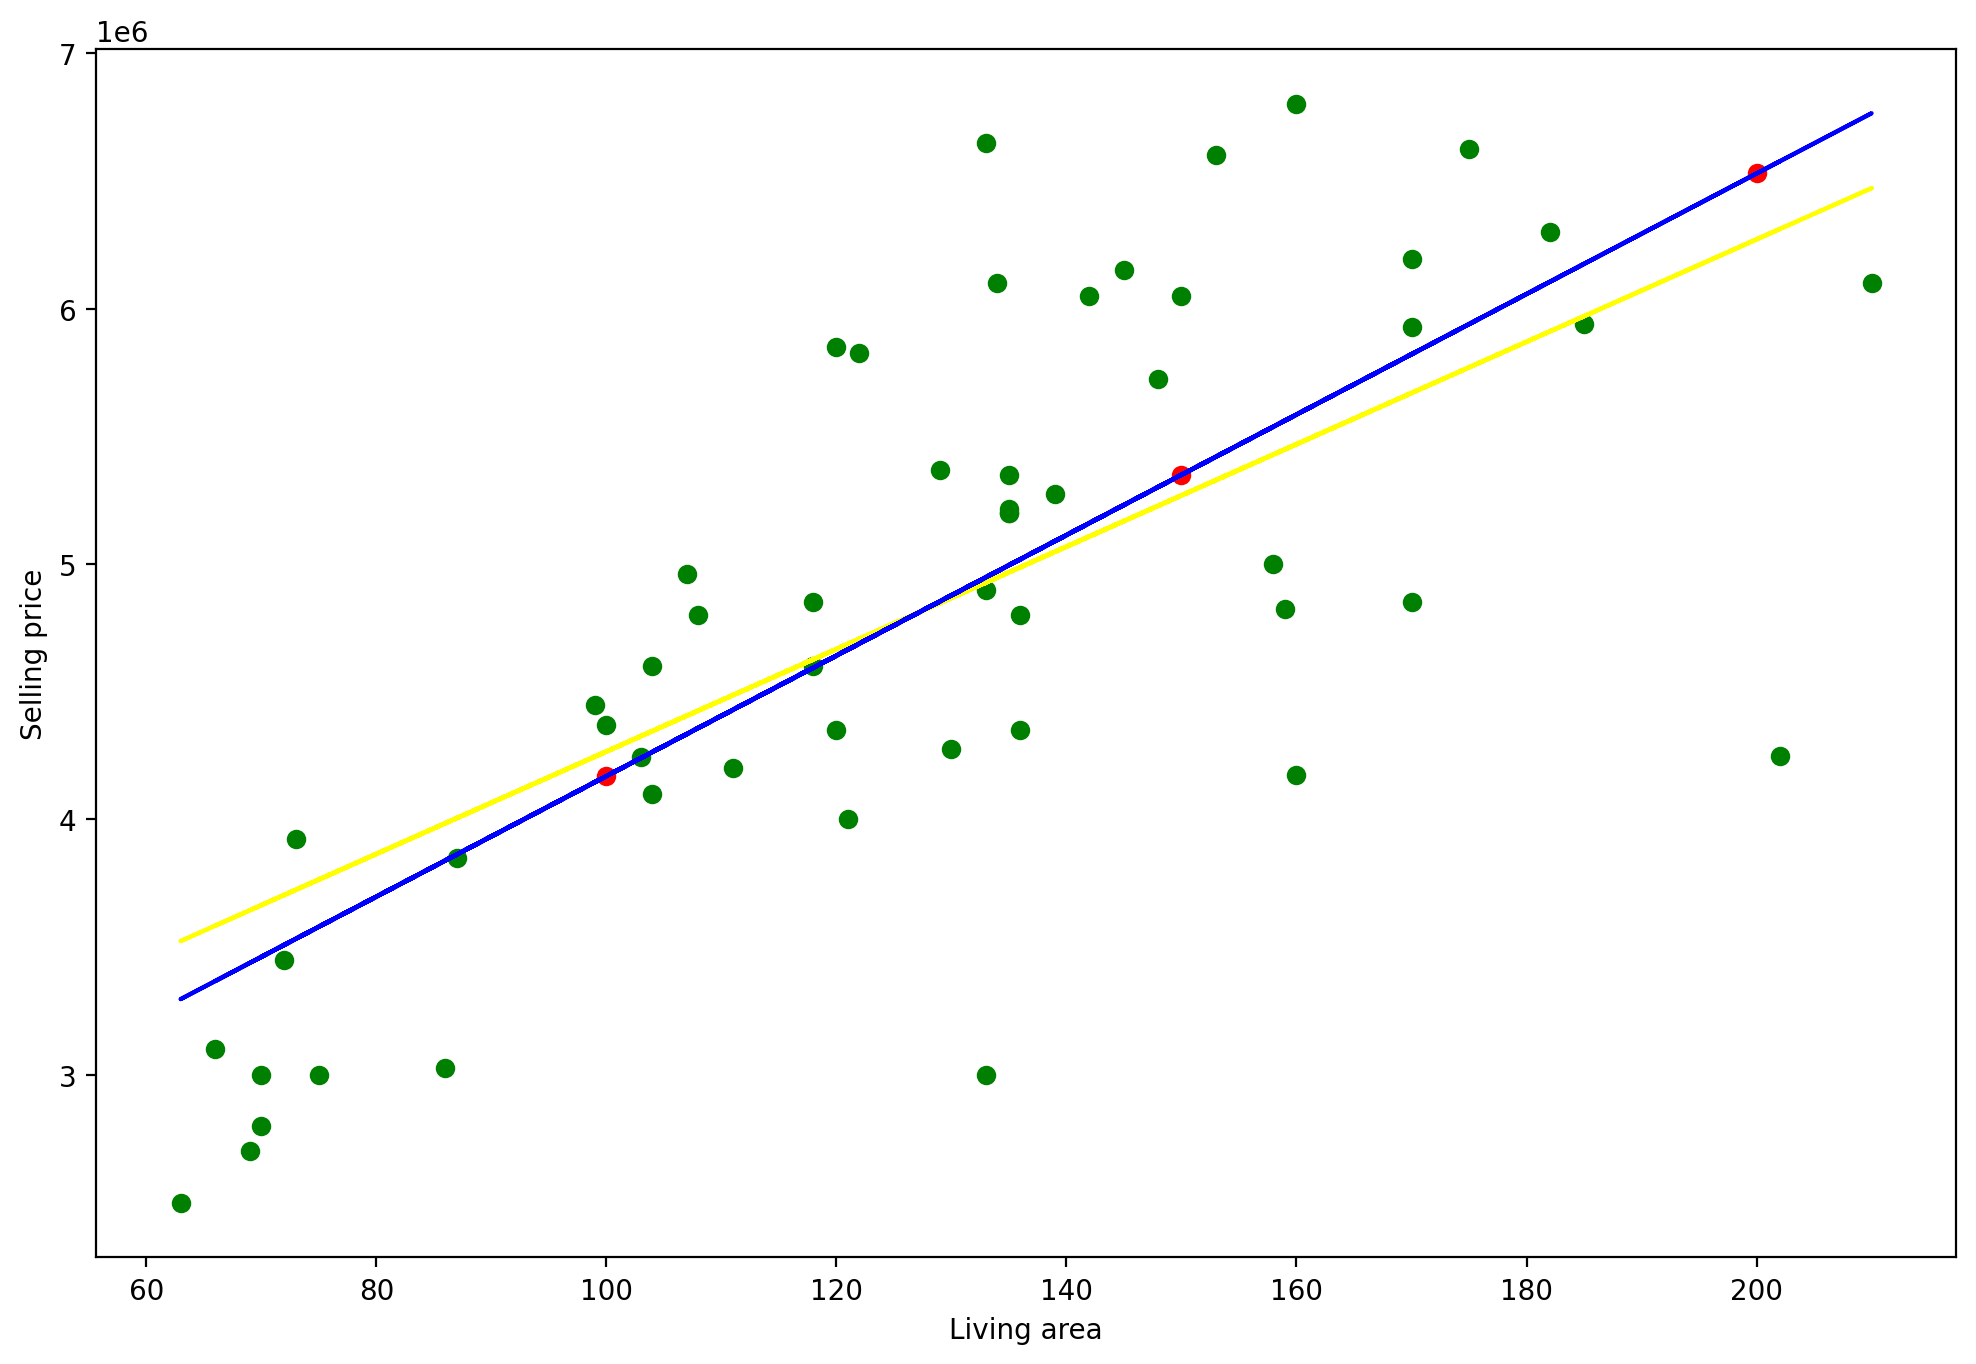

In [97]:
# Plot graphs

plt.figure(figsize=(12, 8), dpi=200)
plt.scatter(X, y,color='g')
plt.plot(X, ridge_reg.predict(X),color='yellow')
plt.plot(X, reg.predict(X),color='b')
plt.scatter(surface_predict, y_pred, color='r')
plt.xlabel("Living area")
plt.ylabel("Selling price")
plt.show()

In [98]:
# QUESTION 2

# IMPORT LIBRARIES & DATASETS
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Import Iris dataset
x_iris, y_iris = load_iris(return_X_y=True)

In [99]:
# Iris is constructed within the dataform : Sepal Length, Sepal Width, Petal Length, Petal Width, Class Label. 
# x_iris

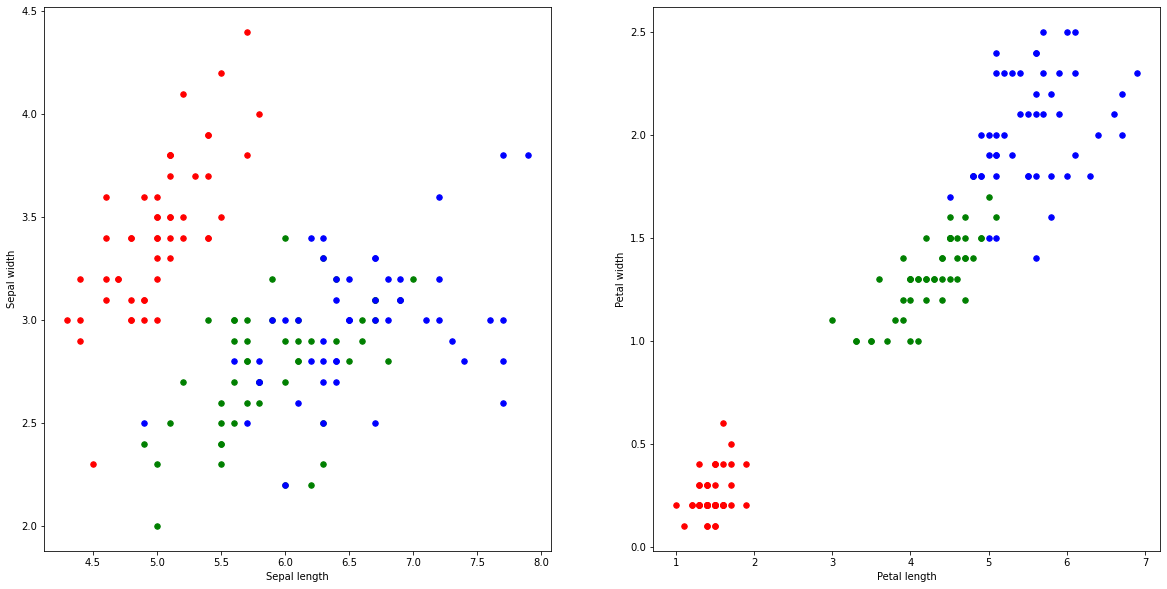

In [100]:
# Graph to visualize dataset

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

color_ = ''

for i in range (0, len(x_iris)):
    
    # Setosa
    if y_iris[i] == 0:
        color_='r' # Red
        
    # Versicolor
    elif y_iris[i] == 1:
        color_='g' # Green

    # Virginica
    else:
        color_='b' # Blue

    # Sepal
    axs[0].scatter(x_iris[i, 0], x_iris[i, 1], s=30, c=color_)
    axs[0].set_xlabel("Sepal length")
    axs[0].set_ylabel("Sepal width")

    # Petal
    axs[1].scatter(x_iris[i, 2], x_iris[i, 3], s=30, c=color_)
    axs[1].set_xlabel("Petal length")
    axs[1].set_ylabel("Petal width")

In [101]:
# Logistic regression model

log_reg = LogisticRegression(max_iter=800).fit(x_iris, y_iris)

In [102]:
# Confusion matrix

confusion_matrix(y_iris, log_reg.predict(x_iris))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [103]:
# Best accuracies / K-weights

k_neighbors = [1, 3, 5, 7, 10, 15, 20, 25, 30]
weights = ["uniform", "distance"]

for k in k_neighbors:
    for w in weights:
        knn_reg = KNeighborsClassifier(k, weights=w).fit(x_iris, y_iris)
        
        print("K={}, weight={}, score={}".format(k, w, knn_reg.score(x_iris, y_iris)))

K=1, weight=uniform, score=1.0
K=1, weight=distance, score=1.0
K=3, weight=uniform, score=0.96
K=3, weight=distance, score=1.0
K=5, weight=uniform, score=0.9666666666666667
K=5, weight=distance, score=1.0
K=7, weight=uniform, score=0.9733333333333334
K=7, weight=distance, score=1.0
K=10, weight=uniform, score=0.98
K=10, weight=distance, score=1.0
K=15, weight=uniform, score=0.9866666666666667
K=15, weight=distance, score=1.0
K=20, weight=uniform, score=0.98
K=20, weight=distance, score=1.0
K=25, weight=uniform, score=0.98
K=25, weight=distance, score=1.0
K=30, weight=uniform, score=0.9533333333333334
K=30, weight=distance, score=1.0


In [105]:
# Confusion matrix for K-nearest-neighbors

# Model selection
knn_reg = KNeighborsClassifier(3, weights="distance").fit(x_iris, y_iris)

confusion_matrix(y_iris, knn_reg.predict(x_iris))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])